In [ ]:
!pip install yfinance

In [1]:
import pandas as pd
#處理圖表用
import numpy as np
import math
#處理運算用
import matplotlib.pyplot as plt

import tw_matplotlib
%matplotlib inline
#畫圖用的
import datetime as dt
#把文字轉成時間用的
import yfinance as yf
#本次核心，下載資料用的

import seaborn as sns
import plotly.express as px
# pkg for interactive vis

import warnings
warnings.filterwarnings('ignore')
#把warning省略掉


In [2]:
# Set matplotlib style

plt.style.use("fivethirtyeight")

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode()

In [3]:
# define color style for output printing

W  = '\033[0m'  # white (normal)
K  = '\033[30m' # black
R  = '\033[31m' # red
G  = '\033[32m' # green
O  = '\033[1;33m' # orange
B  = '\033[34m' # blue
P  = '\033[35m' # purple
T =  '\033[1;33;47m' #Title

In [4]:
TMSC="2330.TW"
GC="6488.TWO"
APPLE="AAPL"
INTEL="INTC"


In [5]:
# Set of selected ticks

ticks=[TMSC,GC,APPLE,INTEL]

In [6]:
# time of period considered

start = dt.datetime(2016, 7, 1)
#同理。這邊把日期寫成變數只是求整潔，你爽的話也可以直接整個函數打上去。
#end = dt.datetime(2022, 2, 10)
end = dt.datetime.today()

In [7]:
# Data fetch

df=pd.DataFrame()
for tick in ticks:
    df[tick]=yf.download(tick, start, end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
df_1=yf.download(ticks, start, end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [9]:
def pd_index_to_YYYY_MM_DD(df):
    df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')
    return df
df1=pd_index_to_YYYY_MM_DD(df_1)

df_1.head(10)

,2330.TW,6488.TWO,AAPL,INTC
Date,,,,
2016-06-30,NaN,NaN,22.169392,27.722912
2016-07-01,138.991287,53.291214,22.236635,27.680651
2016-07-04,138.991287,52.991825,NaN,NaN
2016-07-05,137.316666,53.141521,22.027931,27.621489
2016-07-06,135.223434,52.617596,22.153158,27.866600
2016-07-07,137.735336,53.066673,22.248238,28.060999
2016-07-08,137.735336,NaN,22.419840,28.737167
2016-07-11,142.340439,53.590607,22.489408,29.058340
2016-07-12,143.177750,50.147633,22.591442,29.531662


In [10]:
def pd_sum_same_date_index(df):
    df = df.groupby(df.index).sum()
    return df
df_1=pd_sum_same_date_index(df_1)
df_1.head(20)  

,2330.TW,6488.TWO,AAPL,INTC
Date,,,,
2016-06-30,0.000000,0.000000,22.169392,27.722912
2016-07-01,138.991287,53.291214,22.236635,27.680651
2016-07-04,138.991287,52.991825,0.000000,0.000000
2016-07-05,137.316666,53.141521,22.027931,27.621489
2016-07-06,135.223434,52.617596,22.153158,27.866600
2016-07-07,137.735336,53.066673,22.248238,28.060999
2016-07-08,137.735336,0.000000,22.419840,28.737167
2016-07-11,142.340439,53.590607,22.489408,29.058340
2016-07-12,143.177750,50.147633,22.591442,29.531662


In [11]:
df_1 = df_1.replace(0, np.nan)

df_1 = df_1.fillna(method='ffill')
df_1.head(20)

,2330.TW,6488.TWO,AAPL,INTC
Date,,,,
2016-06-30,NaN,NaN,22.169392,27.722912
2016-07-01,138.991287,53.291214,22.236635,27.680651
2016-07-04,138.991287,52.991825,22.236635,27.680651
2016-07-05,137.316666,53.141521,22.027931,27.621489
2016-07-06,135.223434,52.617596,22.153158,27.866600
2016-07-07,137.735336,53.066673,22.248238,28.060999
2016-07-08,137.735336,53.066673,22.419840,28.737167
2016-07-11,142.340439,53.590607,22.489408,29.058340
2016-07-12,143.177750,50.147633,22.591442,29.531662


In [12]:
df=df_1[1:].copy()

<AxesSubplot:title={'center':' 股價'}, xlabel='Date'>

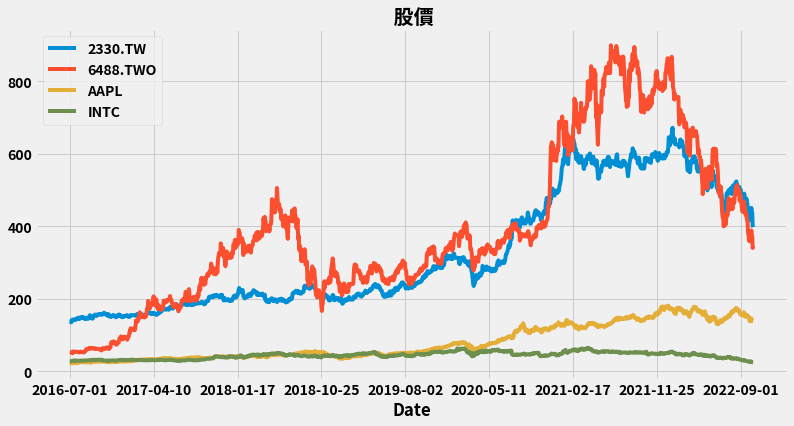

In [13]:
df.plot(figsize=[12,6],title=" 股價")

<AxesSubplot:title={'center':' 對數股價'}, xlabel='Date'>

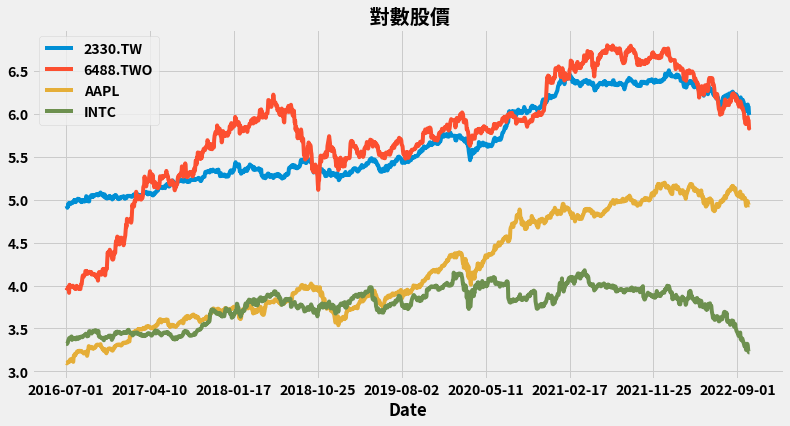

In [14]:
np.log(df).plot(figsize=[12,6],title=" 對數股價")

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax2 = ax.twinx()
#rspine = ax2.spines['right']
#rspine.set_position(('axes', 1.15))
#ax2.set_frame_on(True)
#ax2.patch.set_visible(False)
#fig.subplots_adjust(right=0.7)

p1=np.log(df['2330.TW']).plot(ax=ax, style='b-',label=" 台積電收盤價 ")
# same ax as above since it's automatically added on the right
p2=np.log(df['6488.TWO']).plot(ax=ax, style='r-',label=" 環球晶收盤價 ")#, secondary_y=True,drawstyle="steps")
#df_gigabytes['Adj Close'].plot(ax=ax, style='g-', secondary_y=True,drawstyle="steps")
p3=np.log(df['AAPL']).plot(ax=ax2, style='g-', secondary_y=True,drawstyle="steps")
p4=np.log(df['INTC']).plot(ax=ax2, style='k-', secondary_y=True,drawstyle="steps")
# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis
#ax2.legend([ax.get_lines()[0],  ax2.get_lines()[0],ax.right_ax.get_lines()[0]],\
#             ['台積電','環球晶','Apple','Intel'], bbox_to_anchor=(1.5, 0.5))
ax.legend()
#ax.legend(handles=[p1,p2,p3,p4])
#ax2.legend(['台積電','環球晶'],loc=0)

In [ ]:
# fill nan forword
df.fillna(method="ffill",inplace=True)

In [ ]:
#np.log(df).plot(figsize=[12,6])
np.df.plot(figsize=[12,6])

In [ ]:
# create return feature of each tick

for tick in ticks:
    tick_=tick+'_pct'
    df[tick_]=0
    df[tick_][1:]=df[tick].pct_change()[1:]

In [ ]:
px.line(df)

In [ ]:
trace1 = go.Scatter(
    x=df.index,
    y=df['2330.TW'],
    name='TWMC'
)
trace2 = go.Scatter(
    x=df.index,
    y=df['6488.TWO'],
    name='GC',
    yaxis='y2'
)
trace3 = go.Scatter(
    x=df.index,
    y=df['2454.TW'],
    name='MT',
    yaxis='y3'
)
data = [trace1, trace2,trace3]
layout = go.Layout(
    title='Finance Stock Price',
    width=1000,
    title_x=0.5,
    xaxis=dict(
        title='Date',
        domain=[0.25, 0.75]
    ),
    yaxis=dict(
        title='TWSC'
    ),
    yaxis2=dict(
        title='GC',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        anchor='x',
        overlaying='y',
        side='right'
    ),
    yaxis3=dict(
        title='MT',
        titlefont=dict(
            color='#d62728'
        ),
        tickfont=dict(
            color='#d62728'
        ),
        anchor='free',
        overlaying='y',
        side='right',
        position=0.9
    )
)
fig = go.Figure(data=data, layout=layout)
#iplot(fig, filename='multiple-axes-double')

In [ ]:
ef matplotlib_twinx_visualization_legend(df1, df2,  title1, title2, xlabel1, xlabel2, ylabel1, ylabel2, legend1, legend2):
    fig, ax1 = plt.subplots(figsize=(15,8))
    ax2 = ax1.twinx()
    ax1.set_ylabel(ylabel1)
    ax1.set_title(title1)
    ax1.plot(df1.index, df1)
    ax2.set_ylabel(ylabel2)
    ax2.set_xlabel(xlabel2)
    ax2.set_title(title2)
    ax2.plot(df2.index, df2)
    ax2.legend(legend1, loc='upper left')
    plt.show()

In [15]:
def matplotlib_twinx_visualization_labels(df1, df2, title1, title2, xlabel1, xlabel2, ylabel1, ylabel2):
    fig, ax = plt.subplots(figsize=(15,8))
    ax2 = ax.twinx()
    #ax1.set_ylabel(ylabel1)
    #ax1.set_title(title1)
    ax1.plot(df1.index, df1)
    #ax2.set_ylabel(ylabel2)
    #ax2.set_xlabel(xlabel2)
    #ax2.set_title(title2)
    ax2.plot(df2.index, df2)
    ax2.legend(loc='upper left')
    plt.show()

In [ ]:
 matplotlib_twinx_visualization_labels(np.log(df[['2330.TW','6488.TWO']]), \
                                       np.log(df[['APPL','INTC']]),\
                                       ['台積電','環球晶'],['Apple Inc.','Intel'],
                                      )

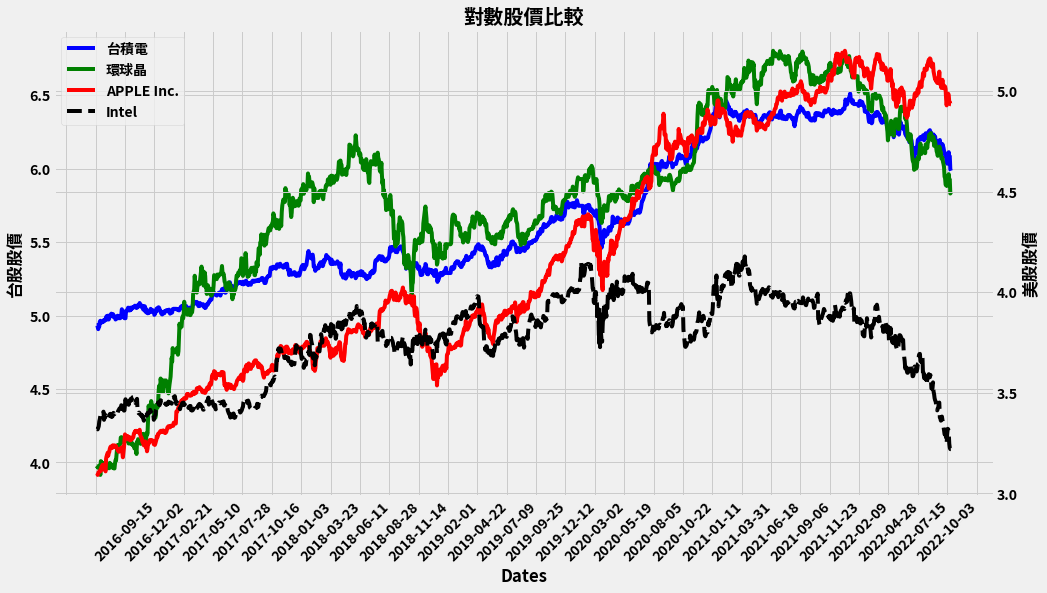

In [47]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

dates=list(df.index)
data1=np.log(df['2330.TW']).values
data2=np.log(df['6488.TWO']).values
data3=np.log(df['AAPL']).values
data4=np.log(df['INTC']).values

fig, ax1 = plt.subplots(figsize=(15,8))
ax2 = ax1.twinx()

ax1.set(title="對數股價比較")

ax1.xaxis.set_tick_params(rotation=45)
#p1=ax1.plot(df.index, df[['2330.TW','6488.TWO']])
#p1=np.log(df['2330.TW']).plot(ax=ax1, style='b-',label=" 台積電收盤價 ")
p1, = ax1.plot(dates, data1, "b-", label="台積電")
p2, = ax1.plot(dates, data2, "g-", label="環球晶")
p3, = ax2.plot(dates, data3, "r-", label="APPLE Inc.")
p4, = ax2.plot(dates, data4, "k--", label="Intel")
#p2=ax2.plot(df.index, df[['AAPL','INTC']])
ax1.set_xlabel("Dates")
ax1.set_ylabel("台股股價")
ax2.set_ylabel("美股股價")
# Ensure a major tick for each week using (interval=1) 
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=8))
ax2.legend(handles=[p1,p2,p3,p4], loc='upper left');


In [35]:
np.log(df['2330.TW']).values

array([4.93441125, 4.93441125, 4.92228969, ..., 6.08221891, 5.99520753,
       5.98519493])

In [31]:
list(df.index)

['2016-07-01',
 '2016-07-04',
 '2016-07-05',
 '2016-07-06',
 '2016-07-07',
 '2016-07-08',
 '2016-07-11',
 '2016-07-12',
 '2016-07-13',
 '2016-07-14',
 '2016-07-15',
 '2016-07-18',
 '2016-07-19',
 '2016-07-20',
 '2016-07-21',
 '2016-07-22',
 '2016-07-25',
 '2016-07-26',
 '2016-07-27',
 '2016-07-28',
 '2016-07-29',
 '2016-08-01',
 '2016-08-02',
 '2016-08-03',
 '2016-08-04',
 '2016-08-05',
 '2016-08-08',
 '2016-08-09',
 '2016-08-10',
 '2016-08-11',
 '2016-08-12',
 '2016-08-15',
 '2016-08-16',
 '2016-08-17',
 '2016-08-18',
 '2016-08-19',
 '2016-08-22',
 '2016-08-23',
 '2016-08-24',
 '2016-08-25',
 '2016-08-26',
 '2016-08-29',
 '2016-08-30',
 '2016-08-31',
 '2016-09-01',
 '2016-09-02',
 '2016-09-05',
 '2016-09-06',
 '2016-09-07',
 '2016-09-08',
 '2016-09-09',
 '2016-09-12',
 '2016-09-13',
 '2016-09-14',
 '2016-09-15',
 '2016-09-16',
 '2016-09-19',
 '2016-09-20',
 '2016-09-21',
 '2016-09-22',
 '2016-09-23',
 '2016-09-26',
 '2016-09-27',
 '2016-09-28',
 '2016-09-29',
 '2016-09-30',
 '2016-10-

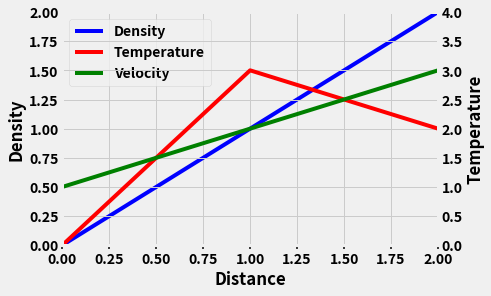

In [30]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()
#fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
#twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
#twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot([0, 1, 2], [0, 1, 2], "b-", label="Density")
p2, = twin1.plot([0, 1, 2], [0, 3, 2], "r-", label="Temperature")
p3, = twin1.plot([0, 1, 2], [1,2, 3], "g-", label="Velocity")

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
twin1.set_ylim(0, 4)
#twin2.set_ylim(1, 65)

ax.set_xlabel("Distance")
ax.set_ylabel("Density")
twin1.set_ylabel("Temperature")
#twin2.set_ylabel("Velocity")

#ax.yaxis.label.set_color(p1.get_color())
#twin1.yaxis.label.set_color(p2.get_color())
#twin2.yaxis.label.set_color(p3.get_color())

#tkw = dict(size=4, width=1.5)
#ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
#twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
#twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

ax.legend(handles=[p1, p2,p3])